###  Project Title : Sensitivity Analysis of Logistic Regression ###
#### Code Owner : Parth Gera ####
#### gera2@illinois.edu #### 
#### https://github.com/geraparth ####
#### https://www.linkedin.com/in/parth-gera-6161aa107/ ####
This code script explores the sensitivity of variables in a logistic regression model. A logistic regression model is created using sample data, and sensitivity of a variable is explored by using a base scenario and Jacobian

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from prettytable import PrettyTable
import cmath

### Logistic Regression model ###

In [2]:
def log_gradient_descent(X, y, w, num_iter, step_size = 1):
    
    """
    To take data points, initial weight vector, iterations, and step size and execute logistic gradient descent to achieve convergence

    Parameters:
            X : 2-D (nxd) numpy array containing all data points (independent variable)
            y : 2-D (nx1) numpy array containing all Y (response variable)
            w : 2-D (dx1) initial Weight vector
            num_iter : Number of iterations for which GD has to be executed
            step_size : Step size of the GD process (learning rate)


    Returns:
            w : 2-D Weight vector for which the function achieved convergence, after executing GD
    """
    
    #Doing the necessary checks
    assert X.shape[0] == y.shape[0], "Size mismatch between X array and y vector"
    assert num_iter < 1e10, "GD iterations are more than the maximum iteration limit"
    
    #data points and dimensions
    n = X.shape[0]
    d = X.shape[1]
    
    loss_dict = {}
    grad_norm = {}
    
    #Gradient descent loop
    for i in range(num_iter):
        
        loss = (1.00/n)*(np.sum(np.log(1 + np.exp(-y*(X@w)))))
        gradient = -(1.00/n)*((X.T@(y*(1/(1 + np.exp(y*(X@w)))))))
        w = w - step_size*gradient
        
        loss_dict[i + 1] = loss
        grad_norm[i + 1] = np.linalg.norm(gradient)
        
    return w, loss_dict, grad_norm

In [3]:
def plot_function(plot_metric, title, xlabel, ylabel):
    """
    To make a plot
    
    Parameters:
            plot metric : A dictionary containing keys as iteration and value as the difference in loss value with the optimal loss (0 in this case)
            title : title of the plot
            xlabel : x label of the plot
            ylabel : y label of the plot
            
    

    Returns:      
    """
    assert isinstance(title, str), "Title of the plot is not a string"
    assert isinstance(xlabel, str), "x-label of the plot is not a string"
    assert isinstance(ylabel, str), "y-label of the plot is not a string"
    
    figure(figsize=(6, 3.5), dpi=300)
    if type(plot_metric) is dict:
        plt.plot(np.log10(list(plot_metric.values())), '-.b')
    else:
        plt.plot(plot_metric, '-.b')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### Generating random data. 500x10 ###

In [4]:
#np.random.normal(3, 2.5, size=(2, 4))
np.random.seed(0)
X_without_bias = np.random.normal(size=(500, 10))
b = np.ones((X_without_bias.shape[0], 1))
X = np.concatenate([b, X_without_bias], axis = 1)
y = np.sign(np.random.normal(size=(X.shape[0], 1)))
w = np.ones((X.shape[1], 1))
lamda = max(np.linalg.eig(X.T@X)[0])/8.00

### Running gradient descent ###

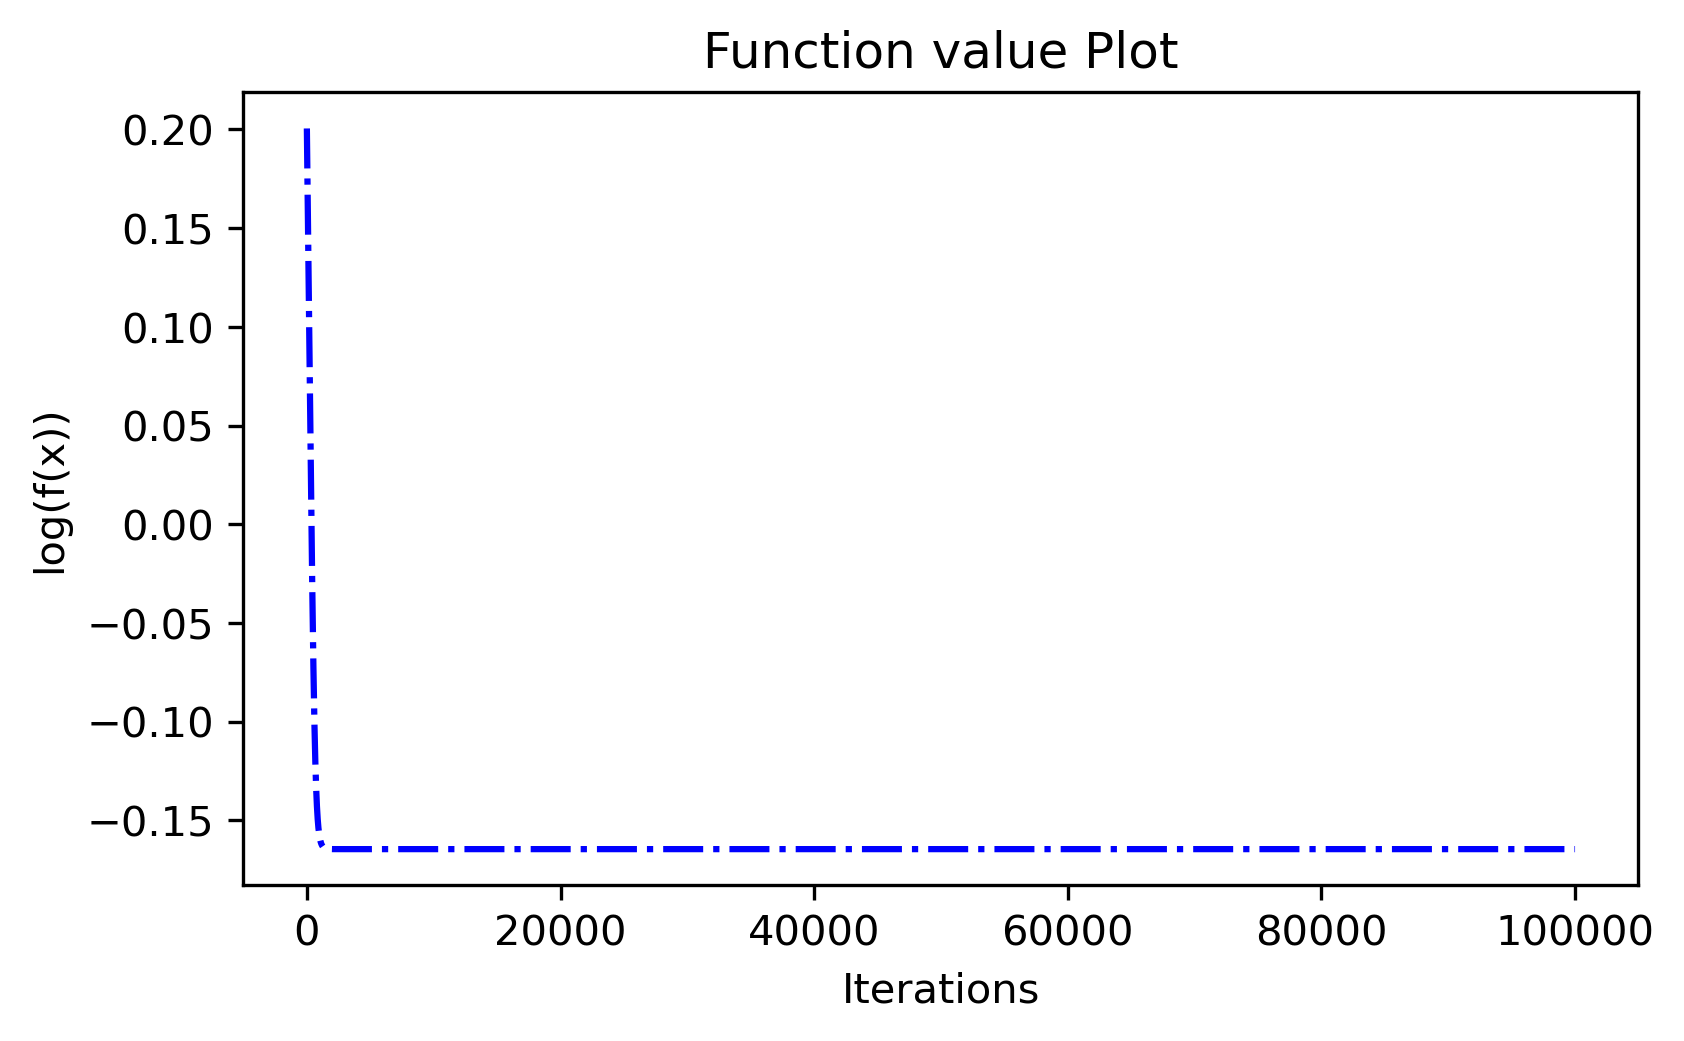

In [5]:
w_final, loss_dict, grad_norm = log_gradient_descent(X, y, w, 100000, step_size = 1/lamda)
title = 'Function value Plot'
xlabel = 'Iterations'
y_label = 'log(f(x))'
plot_function(loss_dict, title, xlabel, y_label)

### Final weights ###

In [6]:
w_final

array([[-0.0926276 ],
       [-0.05848426],
       [ 0.1032236 ],
       [-0.00892699],
       [-0.11219002],
       [-0.00418415],
       [-0.11765876],
       [-0.03786173],
       [-0.13900184],
       [-0.02428198],
       [ 0.06891624]])

In [7]:
def sigmoid(x):
    import math
    sig = 1 / (1 + math.exp(-x))
    return sig

### Creating test data 5x10 and making a prediction###

In [8]:
np.random.seed(0)
X_test = np.concatenate([np.ones((5, 1)), np.random.normal(size=(5, 10))], axis=1)

In [9]:
sigmoid_v = np.vectorize(sigmoid)
y_pred = sigmoid_v(X_test@w_final)
y_pred

array([[0.42761394],
       [0.47327251],
       [0.61055595],
       [0.48136214],
       [0.41000487]])

### Base Scenario : Lets consider x_test[0] - first test data point as the base scenario ###

In [10]:
#Base scenario
X_test[0]

array([ 1.        ,  1.76405235,  0.40015721,  0.97873798,  2.2408932 ,
        1.86755799, -0.97727788,  0.95008842, -0.15135721, -0.10321885,
        0.4105985 ])

In [11]:
#Predicted probability of this scenario
p = y_pred[0]
p

array([0.42761394])

In [12]:
#Jacobian: Each value represents the change in predicted probability with unit change in x_{i} (Assuming all other variables remain the same)
J = w_final*p*(1-p)
J

array([[-0.02267156],
       [-0.01431462],
       [ 0.02526503],
       [-0.00218497],
       [-0.02745966],
       [-0.00102411],
       [-0.02879819],
       [-0.00926705],
       [-0.03402213],
       [-0.00594326],
       [ 0.01686796]])

### New Scenario : Change 1st variable in the base scenario by 3 units ###

In [13]:
#Assuming we change our 1st variable (after bias) by 3 units
X_test_v2 = X_test[0].copy()
X_test_v2[1] = X_test[0][1] + 3

In [14]:
X_test[0]

array([ 1.        ,  1.76405235,  0.40015721,  0.97873798,  2.2408932 ,
        1.86755799, -0.97727788,  0.95008842, -0.15135721, -0.10321885,
        0.4105985 ])

In [15]:
X_test_v2

array([ 1.        ,  4.76405235,  0.40015721,  0.97873798,  2.2408932 ,
        1.86755799, -0.97727788,  0.95008842, -0.15135721, -0.10321885,
        0.4105985 ])

In [16]:
#The predicted probability for new scenario
y_pred_v2 = sigmoid_v(X_test_v2@w_final)
y_pred_v2

array([0.38531573])

In [17]:
#Checking the above with Jacobian calculation (Change in prob. = w_[i]*p*(1-p))
p + J[1]*3

array([0.38467007])

### Observation : ###